In [3]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#tell sympy to render all output using LaTeX

from sympy import init_printing
init_printing()

def linearconv(nx):
    dx = 2/(nx-1)
    nt = 20
    #nt = 10
    c = 1
    sigma = .5
    x = numpy.linspace(0,2,nx)
    
    dt = sigma*dx
    #dt = .02
    
    u = numpy.ones(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)] = 2
    
    un = numpy.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1])
        u[0] = 1.0
        
    pyplot.plot(x, u, color='#003366', ls='--', lw=3)
    pyplot.ylim(0, 2.5)

In [4]:
x = (1*0.2)/(4)

In [5]:
print(x)

0.05


In [6]:
x = sympy.symbols('x')

In [7]:
x

In [8]:
ans = (sympy.cos(x)**2*sympy.sin(x)**3)/(4*x**5*sympy.exp(x))

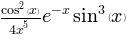

In [9]:
ans

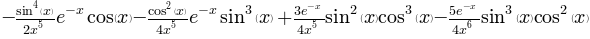

In [10]:
ansprime = ans.diff(x)
ansprime

In [11]:
from sympy.utilities.lambdify import lambdify

In [12]:
a_lamb = lambdify((x), ansprime)
a_lamb(2.2)



In [116]:
#Traffic Problem!!

#initial conditions



Vmax = 80
L = 11
rhoMax = 250
nx = 51
dt = .001
dx = L/nx
nt = 0


x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*10
rho0[10:20] = 50
#F = Vmax*rho*(1-((rho)/(rhoMax)))


#p(0,t) = 10
#for n in range[float(nt)/100 for nt in range(0,100,1)]:
while nt <=.05:
    rho = rho0.copy()
    for i in range(1,nx):
        #rho0[1:] = rho[1:] - dt/dx*(Vmax*rho[1:]*(1-((rho[1:])/(rhoMax)))-Vmax*rho[0:-1]*(1-((rho[0:-1])/(rhoMax))))
        rho0[i] = rho[i] - dt/dx*(Vmax*rho[i]*(1-((rho[i])/(rhoMax)))-Vmax*rho[i-1]*(1-((rho[i-1])/(rhoMax))))
        rho0[0] = 10
    nt = nt + dt
print(rho)

print(rho.max())

V = Vmax*(1-(rho.mean()/rhoMax))
print(V)

[ 10.          10.          10.          10.          10.          10.          10.
  10.          10.          10.          10.00000007  10.0000019
  10.00002536  10.00022311  10.00145429  10.0074999   10.03192029
  10.11549871  10.363101    11.00710056  12.48500305  15.45130099
  20.51678931  27.54942185  35.10032132  41.14161037  44.58317751
  45.59762255  44.85834806  42.96831092  40.34233529  37.25978684
  33.92286057  30.49047591  27.09524136  23.85145767  20.85780846
  18.1960292   15.92641137  14.0817272   12.66229786  11.63546046
  10.94158728  10.50598462  10.25297032  10.11738043  10.05045507
  10.02006005  10.00736652  10.00249492  10.00077803]
45.5976225452
74.2901979574


$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = v \frac{\partial^2 u}{\partial x^2}$$

$$\frac{\partial p}{\partial t} + \frac{\partial F}{\partial x} = 0$$

This is combination of linear convection and diffusion. Discretize using the methods we have seen.

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = v \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

$$\frac{p_i^{n+1} - p_i^n}{\Delta t} + \frac{F_i^n - F_{i-1}^n}{\Delta x} = 0$$

$$p_i^{n+1} =  p_i^n - \frac{\Delta t}{\Delta x} (F_i^n - F_{i-1}^n)$$

In [84]:
V = 22.222*(1-(249/rhoMax))
print(V)

0.08888800000000008


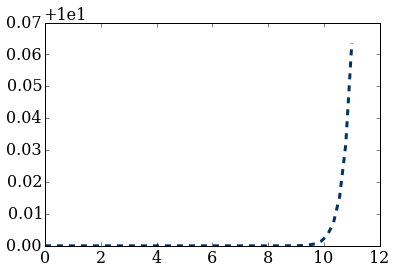

In [85]:
pyplot.plot(x,rho,color='#003366', ls='--',lw=3)
pyplot.ylim()
#Increased grid size from 41 to 100 to make the graph better

In [112]:
.001/0.1

In [123]:
#Traffic Problem!! Part B

#initial conditions



Vmax = 136
L = 11
rhoMax = 250
nx = 51
dt = .001
dx = L/nx
nt = 0


x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50
#F = Vmax*rho*(1-((rho)/(rhoMax)))


#p(0,t) = 10
#for n in range(nt):
while nt <=.05:
    rho = rho0.copy()
    for i in range(1,nx):
        #rho0[1:] = rho[1:] - dt/dx*(Vmax*rho[1:]*(1-((rho[1:])/(rhoMax)))-Vmax*rho[0:-1]*(1-((rho[0:-1])/(rhoMax))))
        rho0[i] = rho[i] - dt/dx*(Vmax*rho[i]*(1-((rho[i])/(rhoMax)))-Vmax*rho[i-1]*(1-((rho[i-1])/(rhoMax))))
        rho0[0] = 20
    nt = nt + dt
print(rho)

print(rho.max())

V = Vmax*(1-(rho.mean()/rhoMax))
print(V)

[ 20.          20.          20.          20.          20.          20.          20.
  20.          20.          20.          20.          20.          20.          20.
  20.          20.00000002  20.00000013  20.00000097  20.00000605
  20.00003303  20.00015942  20.00068707  20.0026678   20.00940483
  20.03030813  20.08982212  20.24600707  20.62447262  21.46788952
  23.17126892  26.19360844  30.68121671  35.95674146  40.66054835
  43.74176621  45.05110084  44.99797467  44.05374433  42.55884957
  40.72656402  38.69059359  36.54214759  34.35121059  32.17746874
  30.07554278  28.09696113  26.28981469  24.69636578  23.34889678
  22.26466465  21.44169718]
45.0511008418
121.938771138
